# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

# Creating Dataset Using Random MultiVariate Normal 

In [2]:
## Define a dataset
mean_01 = np.array([1.0, 0.5])
cov_01 = np.array([[1.0,0.1],[0.1,1.2]])

mean_02 = np.array([7.3,6.5])
cov_02 = np.array([[1.0,0.1],[0.1,1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


# Displaying Scatter Plot of the dataset 

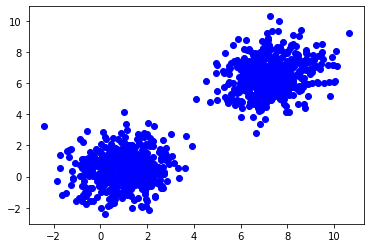

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1], color='blue')
plt.scatter(dist_02[:,0],dist_02[:,1], color='blue')

plt.show()

In [9]:
## Input data :- (dist_01.shape[0]+dist_02.shape[0], #num_features)
data = np.concatenate((dist_01, dist_02))
print(data.shape)

# print(data.min(), data.max())

(1000, 2)


# KMeans Clustering -> Parameter Definition
- Centroid
- History of the centroid locations
- Points in the cluster

In [5]:
## KMeans Clustering -> Parameter Definition
K = 4 ## Number of clusters
clusters = {}
for cx in range(K):
    params = {
        'centroid': np.random.uniform(low=data.min(), high=data.max(),size=(data.shape[1])),
        'history': [], # history of the centroid locations
        'points' : [], # points in the cluster -> for centroid recalculation
    }
    clusters[cx] = params
pprint(clusters)


colors = ['yellow','red','blue','green']

{0: {'centroid': array([5.39631403, 8.93350543]), 'history': [], 'points': []},
 1: {'centroid': array([7.15215035, 0.78619078]), 'history': [], 'points': []},
 2: {'centroid': array([ 3.13025081, 10.11820137]),
     'history': [],
     'points': []},
 3: {'centroid': array([6.83883619, 6.34790611]), 'history': [], 'points': []}}


# Distance Function 
For calculating the distance between the points and the centroids 

In [6]:
## Defining a Distance function
def distance(p1, p2):
    '''Euclidian Distance'''
    return np.sqrt(((p1-p2)**2).sum())

# distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

### Execution Logic
- Assign points to clusters and calculate Cluster ID for the particular points
- Update the centroid and its location
- Remove points from the cluster

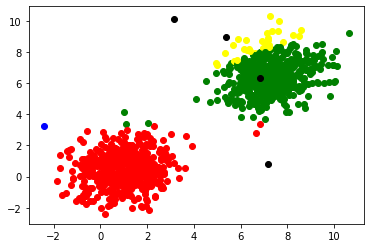

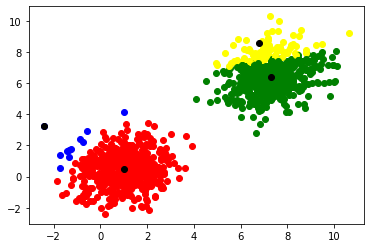

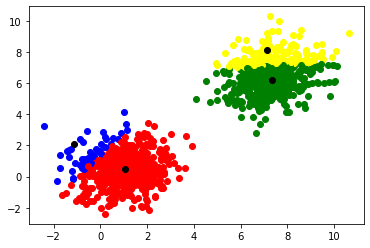

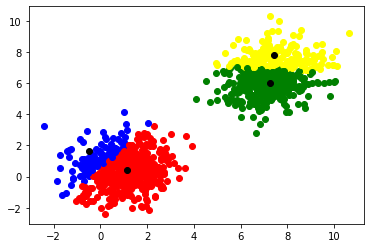

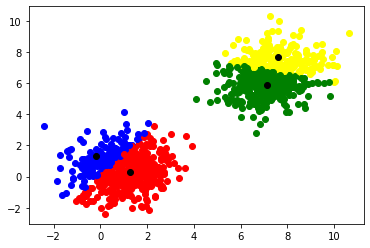

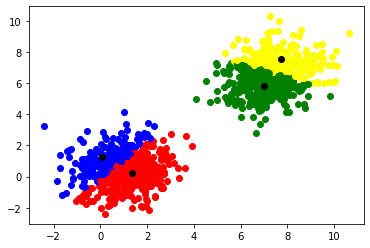

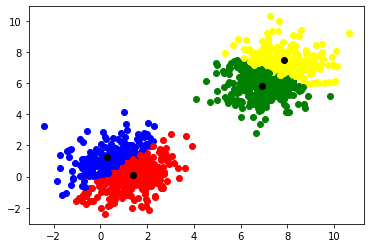

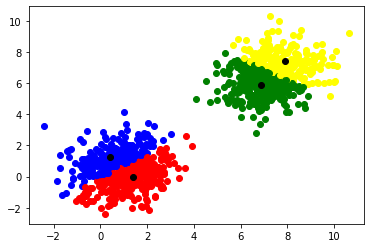

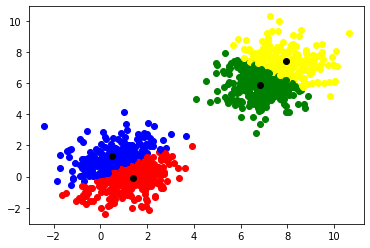

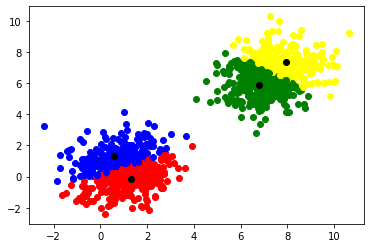

[array([7.15215035, 0.78619078]), array([1.01356034, 0.51228946]), array([1.03345745, 0.4901925 ]), array([1.13112076, 0.41826595]), array([1.27139453, 0.32815837]), array([1.35386072, 0.21959997]), array([1.39598008, 0.09665204]), array([ 1.40074927, -0.00709742]), array([ 1.38227681, -0.09491259]), array([ 1.32396369, -0.1666476 ])]


In [7]:
## Execution logic
n_steps = 10
for ix in range(n_steps):
    plt.figure(ix)
    # Step 1. -> Assign points to clusters
    for ix in range(data.shape[0]):
        d = []
        for cx in range(K):
            dist = distance(data[ix], clusters[cx]['centroid'])
            d.append(dist)
        d = np.asarray(d)
        c_id = np.argmin(d) ## Cluster ID for the particular point

        plt.scatter(data[ix,0], data[ix, 1], color=colors[c_id])

        clusters[c_id]['points'].append(data[ix])

    for cx in range(K):
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], color='black')

    # Step 2. -> Update the centroid
    for cx in range(K):
        clusters[cx]['history'].append(clusters[cx]['centroid'])

        if len(clusters[cx]['points']) !=0:
            new_val = np.array(clusters[cx]['points']).mean(axis=0)

            clusters[cx]['centroid'] = new_val # updated centroid location


        ## Step 3. Remove points from the cluster
        clusters[cx]['points'] = []   

    plt.show()
print(clusters[1]['history'])

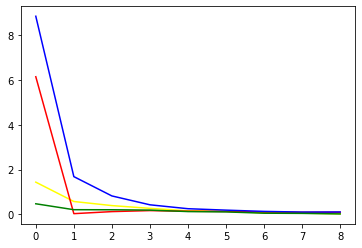

In [8]:
plt.figure(0)
for cx in range(K):
    hist_d = []
    for pt in range(1, len(clusters[cx]['history'])):
        hist_d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(hist_d, color=colors[cx])
plt.show()